### Part 2：
$loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$

In [ ]:
def loss(x, y, y_hat):
    return sum(abs(y_hat_i-y_i) for y_hat_i,y_i in zip(y_hat,y))/len(y)

In [ ]:
def partial_b(x, y, y_hat):
    return sum([1 if y_hat_i-y_i>=0 else -1 for y_i, y_hat_i in zip(list(y), list(y_hat))])/len(x)    

In [ ]:
def partial_k(x, y, y_hat):
    return sum([x_i if y_hat_i-y_i>=0 else -1*x_i for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat))])/len(x)

In [ ]:
from sklearn.datasets import load_boston
data = load_boston()
X = data['data']
y = data['target']

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
plt.scatter(X[:,5], y)

In [ ]:
x = X[:, 5]
type(x)

In [ ]:
import random
k = 1
b = -5

loops = 3000
learning_rate =1e-3
min_loss = float('inf')

for i in range(loops):
    y_hat = [k*x_i+b for x_i in x]
    current_loss = loss(x, y, y_hat)
    
    if min_loss > current_loss:
        min_loss = current_loss
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, k, b, min_loss))
    k = k - partial_k(x,y,y_hat)*learning_rate
    b = b - partial_b(x,y,y_hat)*learning_rate

In [ ]:
plt.scatter(x, y)
plt.scatter(x, [k*i+b for i in x])

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [27]:
def edit_distance(str1, str2):
    matrix = [[ i + j for j in range(len(str2) + 1)] for i in range(len(str1) + 1)]
    
    operation_matrix = [[ '' for j in range(len(str2) + 1)] for i in range(len(str1) + 1)]
    for j in range(1, len(str2)+1):
        operation_matrix[0][j] = operation_matrix[0][j-1] + 'ADD {};'.format(str2[j-1])
    for i in range(1, len(str1)+1):
        operation_matrix[i][0] = operation_matrix[i-1][0] + 'DEL {};'.format(str1[i-1])

    for i in range(1, len(str1)+1):
        for j in range(1, len(str2)+1):
            if(str1[i-1] == str2[j-1]):
                d = 0
                operation = ''
            else:
                d = 1
                operation = 'SUB {}=>{};'.format(str1[i-1], str2[j-1])
            
            matrix[i][j], operation_matrix[i][j] = min(
                (matrix[i-1][j-1] + d, operation_matrix[i-1][j-1] + operation),
                (matrix[i-1][j] + 1, operation_matrix[i-1][j] + 'DEL {};'.format(str1[i-1])),
                (matrix[i][j-1] + 1, operation_matrix[i][j-1] + 'ADD {};'.format(str2[j-1])))

    return matrix[-1][-1], operation_matrix[-1][-1]

In [28]:
edit_distance('jieba', 'beijing')

(6, 'ADD b;ADD e;ADD i;DEL e;SUB b=>n;SUB a=>g;')

### Part 5-1: review machine learning

1. Why do we use Derivative / Gradient to fit a target function?

Ans: 在目标函数的梯度或导数等于0时，得到目标函数的极值。所以求目标函数的极值等价于求解，目标函数梯度=0 这个表达式

    

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans: 梯度指损失函数对各变量的导数；梯度为0时，求得损失函数极小值，下降即指沿梯度值变小的方向求解极小值


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans: 更通用、简单、高效

4. Using the simple words to describe: What's the machine leanring.¶

Ans: 计算机从数据中学到规则，并可以利用学到的规则生成新的数据
    

### Part 5: Answer following questions:

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked search problme?

Ans：
1. 动态规划适用于求解具有重叠子问题和最优子结构特征的问题
2. 动态规划和基于搜索是两种不同的算法思维

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the right answer based on inputs?

Ans:
1. 机器学习不是万能的
2. 部分问题，动态规划算法求解更方便快速

3. Can you catch up at least 3 problems which could solved by Dynamic Programming?

Ans:
1. 最长公共子字符串
2. 最长递增子序列
3. 最大子集和

4. Can you catch up at least 3 problems wich could sloved by Edit Distance?

Ans:
1. 单词拼写检查
2. 
3. 

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature.

Ans:
1. 重叠子问题及最优子结构：原始问题可以分解为子问题，且子问题之间出现重叠；分治算法是将原始问题分解为无关的子问题 ；原始问题的最优解是通过子问题的最优解获得；
2. 需要储存全部或部分子问题的最优解；
3. 得到最优解的结果后，得到最优解的具体过程还需要额外处理
    

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans:
1. 动态规划只适用于特定类的问题
2. 对于部分问题，动态规划可能计算很多不必要的子问题，如杨辉三角形：C(n,m) = C(n-1,m) + C(n-1,m-1)，需要计算所有的值
3. 动态规划总是计算全局最优解，导致时间和空间复杂度过高；对于部分问题，近似解即可满足要求




### (Optinal) Finish the k-person-salesman problem:

1.生成随机点

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]
latitudes, longitude

([-49,
  56,
  -74,
  84,
  56,
  -43,
  -75,
  -98,
  -96,
  33,
  81,
  -80,
  62,
  -3,
  96,
  -63,
  81,
  29,
  -11,
  -52],
 [25,
  -27,
  32,
  -96,
  -76,
  10,
  34,
  79,
  88,
  -79,
  99,
  -95,
  -40,
  27,
  -58,
  52,
  -6,
  -3,
  -14,
  -28])

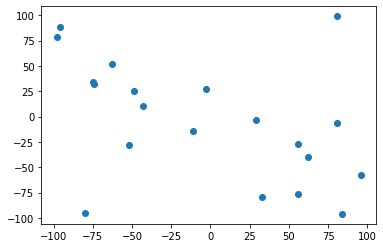

In [3]:
plt.scatter(latitudes, longitude)

2.点间距离

In [4]:
import math
def distance(x1,x2):
    return math.sqrt((x1[0]-x2[0])**2+(x1[1]-x2[1])**2)

In [5]:
x1 = [0, 0]
x2 = [3, 4]
distance(x1, x2)

5.0

In [6]:
def distance_matrix(arr):
    return [[distance(x1,x2) for x1 in arr] for x2 in arr]

In [7]:
distance_matrix([x1,x2])

[[0.0, 5.0], [5.0, 0.0]]

3.最短路径-----自顶向下，递归
    1. 起始点和待遍历点中某一点的距离，剩下所有点的最短路径，计算两者之和
    2. 遍历所有点，重复 1 中的计算
    3. 从 2 的结果中选择最小值

In [8]:
def rec_TSP(s, arr):
    result = {'dist':float('inf'), 'path': []}
    
    if len(arr)==1:
        result['dist'] = distance(s, arr[0])
        result['path'] = [s, arr[0]]
    
    for i in range(len(arr)):
        next_ = rec_TSP(arr[i], arr[:i]+arr[i+1:])
        if distance(s,arr[i]) + next_['dist'] < result['dist']:
            result['dist'] = distance(s,arr[i]) + next_['dist']
            result['path'] = [s] + next_['path']
    
    return result
    

In [9]:
arr=[(1, 0), (1, 1), (0, 1), (0.5, 0.5), (2, 0)]
start = (0, 0)
rec_TSP(start, arr)

{'dist': 4.414213562373095,
 'path': [(0, 0), (0, 1), (1, 1), (0.5, 0.5), (1, 0), (2, 0)]}

In [11]:
arr = list(zip(latitudes[:10], longitude[:10]))
start = (1, 1)
solution = rec_TSP(start, arr)

In [12]:
solution

{'dist': 414.9298962813669,
 'path': [(1, 1),
  (56, -27),
  (84, -96),
  (56, -76),
  (33, -79),
  (-43, 10),
  (-49, 25),
  (-74, 32),
  (-75, 34),
  (-98, 79),
  (-96, 88)]}

4.作图

In [15]:
import matplotlib.pyplot as plt
def plot_path(path,**kwargs):
    x = [p[0] for p in path] 
    y = [p[1] for p in path]
    plt.plot(x,y,marker='o')
    start = path[0]
    plt.text(*start,'start',fontsize=16)

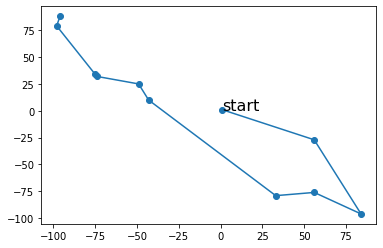

In [16]:
plot_path(solution['path'])

5.动态规划

    1.点集S{0,1,2...n-1}，起点为 0；
    
    2.所求问题表示为 dp(S)，辅助表达式 C(i,S)表示点 i 为终点时的最短路径，点0和i都包含在集合S中
    
    3.dp(S)=min( C(i,S) for i in S )
    
    4.T(i,S)=min( C(j,S-{j}) + distance(i,j) for j in S ),j 表示路径中倒数第二个点
    
    5.S的所有子集可以通过 2**n 个整数的比特数表达，比特数每一位0或1表示该位元素存在与否。如 bin(20)=10100，表示集合{2，4}
   

In [18]:
def dp_TSP(cities, M):
    n = len(cities)
    T = [[(float('inf'), '')] * (1 << n) for _ in range(n)]
    # T[i][k] = C(i,k), 表示 k 对应的点子集， i 表示终点时的最短路径

    T[0][1] = 0, '0'
    # C(0, {0}) 表示只有起点, 路径为空

    for s in range(1 << n):
        if sum(((s >> j) & 1) for j in range(n)) <= 1 or not (s & 1):
            # x & 1 表示 x 的比特数的最后一位
            # s >> j 表示 s 的比特数右移 j 位，即删除后 j 位
            # (s >> j) & 1) for j in range(n) 表示 s 的比特数的每一位
            # s 代表的集合必须含有2个及以上元素
            # s & 1：s 比特位最后一位为 1， 即所代表的集合必须含有起点 0
            continue

        for i in range(1, n):
            if not ((s >> i) & 1):
                # 元素 i 不在 s 表示的集合内
                continue
            for j in range(n):
                if j == i or not ((s >> j) & 1):
                    # 元素 j 不能等于 i， 且必须包含在集合 s 中
                    continue

                T[i][s] = min(
                    T[i][s],
                    (T[j][s^(1 << i)][0] + M[i][j], T[j][s^(1 << i)][1] + '->{}'.format(i))
                )
    return min(T[i][(1 << n) - 1] for i in range(1, n))

In [19]:
def parse_path(path, cities):
    return[
        cities[int(s)] for s in path.split('->')
    ]

In [20]:
def solve_TSP(cities):
    M = distance_matrix(cities)
    min_dist, best_path = dp_TSP(cities, M)
    cities_by_order = parse_path(best_path, cities)
    print('最短距离： ', min_dist)
    print('最优路径： ', best_path)
    return min_dist, cities_by_order

最短距离：  706.3210984063309
最优路径：  0->6->16->3->17->8->11->12->14->7->9->15->10->18->1->4->2->5->19->13


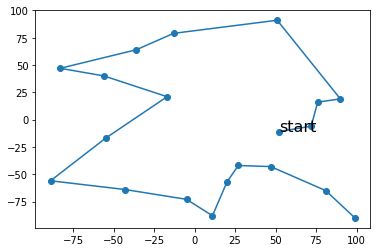

In [21]:
cities = [random.sample(range(-99, 100), 2) for x in range(20)]
min_dist, cities_by_order = solve_TSP(cities)
plot_path(cities_by_order)

6.多个起点

In [24]:
def clf(starts, data):
    M = np.zeros((len(starts), len(data)))
    n, m = M.shape
    for i in range(n):
        for j in range(m):
            M[i, j] = distance(starts[i], data[j])
    return np.argmin(M, axis=0)

In [25]:
def regroup(starts, cities):
    target = clf(starts, cities)
    results = [[p] for p in starts]

    for i in range(len(starts)):
        group_i = [cities[j] for j in range(len(cities)) if target[j]==i]
        results[i].extend(group_i)

    return results

In [32]:
def plot_groups(starts, cities):
    colors = 'rbgyp'
    groups = regroup(starts, cities)
    for i in range(len(groups)):
        group = groups[i]
        x = [p[0] for p in group]
        y = [p[1] for p in group]
        plt.scatter(x[1:], y[1:], marker='o', color=colors[i])
        plt.scatter(x[0], y[0], marker='x', color=colors[i])
        plt.text(*starts[i], 'start')
        

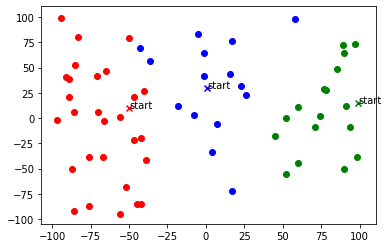

In [33]:
cities = [random.sample(range(-99, 100), 2) for x in range(60)]
starts = [[-50, 10], [1, 30], [99, 15]]
plot_groups(starts, cities)
plt.show()

In [34]:
def solve_kTSP(starts, cities):
    groups = regroup(starts, cities)
    results = []
    for i in range(len(groups)):
        print('{}组{}点: '.format(i+1, len(groups[i])), groups[i])

        M = distance_matrix(groups[i])
        min_dist, best_path = dp_TSP(groups[i], M)
        cities_by_order = parse_path(best_path, groups[i])
        print('最短距离： ', min_dist)
        print('最优路径： ', best_path)
        results.append((min_dist, cities_by_order))
    return results

1组18点:  [[-50, 10], [-77, 77], [-82, -69], [-69, 7], [-88, 59], [-50, 56], [3, -73], [-75, 98], [-73, 4], [-31, -39], [-71, 66], [-23, -5], [3, -62], [-71, 99], [-77, 32], [-60, 34], [-80, 39], [-92, -5]]
最短距离：  460.3620784552156
最优路径：  0->11->9->12->6->2->17->8->3->14->16->15->5->10->4->1->7->13
2组11点:  [[1, 30], [28, -95], [5, 51], [37, 95], [-1, 26], [22, -17], [-7, 30], [42, 35], [2, -17], [19, -54], [-51, 90]]
最短距离：  410.870414291129
最优路径：  0->4->6->2->10->3->7->5->8->9->1
3组14点:  [[99, 15], [69, 31], [64, -34], [95, 8], [61, -78], [90, -47], [49, -75], [60, 2], [48, -91], [66, 36], [54, -83], [43, -79], [67, -47], [70, 9]]
最短距离：  241.36814742249496
最优路径：  0->3->1->9->13->7->2->12->5->4->10->6->11->8


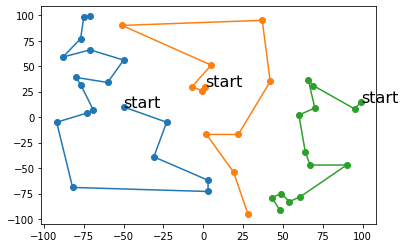

In [35]:
cities = [random.sample(range(-99, 100), 2) for x in range(40)]
starts = [[-50, 10], [1, 30], [99, 15]]

results = solve_kTSP(starts, cities)

colors = 'rbgyp'
for i in range(len(starts)):
    min_dist, cities_by_order = results[i]
    plot_path(cities_by_order, color=colors[i])
plt.show()

7.更好的分组   


todo: